  **Problem statement**

  The task is to perform sentiment analysis on movie reviews to classify them into positive or negative sentiments. The goal is to develop a machine learning model capable of accurately identifying the sentiment expressed in a given movie review text.

  **Dataset**



  *   The dataset consists of a large collection of movie reviews, each labeled with its corresponding sentiment (positive or negative).

  *   Each movie review is represented as a text document containing user-generated content expressing opinions about the movie.

  *   The dataset is balanced across different sentiment classes to ensure fair representation of all sentiments.





**Dataset link**: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [7]:
import pandas as pd
import numpy as np

**import dataset**

In [8]:
df=pd.read_csv('/content/IMDB Dataset.csv')

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**checking missing values**

In [10]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

As we see that we have no missing value in the dataset

**checking** **duplicates**

In [11]:
df.duplicated().sum()

418

**drop duplicates**

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

**checking the sentiment column**

In [14]:
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

As we see that we have 24884 positive reviews and 24698 negative reviews.

**Visualization**

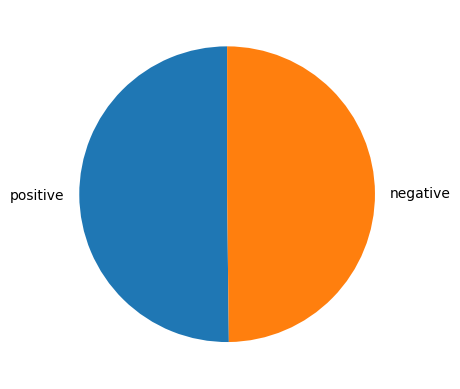

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['sentiment'].value_counts(),labels = df['sentiment'].value_counts().index,startangle=90)
plt.show()

we add the feature by "transformed_text" who show us the length

In [16]:
df['transformed_text']=df['review'].apply(len)

In [17]:
df.head()

,review,sentiment,transformed_text
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [19]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer

# Download stopwords and stemmer
nltk.download('stopwords')
nltk.download('snowball_data')

def preprocess_text(text):
    # Remove HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    clean_text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', clean_text)
    # Tokenize into sentences
    sentences = sent_tokenize(clean_text)

    # Process each sentence
    processed_sentences = []
    for sentence in sentences:
        # Remove punctuation
        sentence = sentence.translate(str.maketrans('', '', string.punctuation))
        # Convert to lowercase
        sentence = sentence.lower()
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = sentence.split()
        filtered_words = [word for word in words if word.lower() not in stop_words]

        # Apply Snowball Stemmer to each word
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in filtered_words]

        processed_sentence = ' '.join(stemmed_words)
        processed_sentences.append(processed_sentence)

    # Join the processed sentences back into a single string
    clean_text = ' '.join(processed_sentences)

    # Correct text using TextBlob
    # Uncomment the following lines if you want to use TextBlob for text correction
    # txtblb = Text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package snowball_data to /root/nltk_data...


In [20]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [23]:
!pip install nltk
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
df['sent_tokenized'] = df['review'].apply(lambda x: len(sent_tokenize(x)))

In [27]:
df.head()

,review,sentiment,transformed_text,sent_tokenized
0,One of the other reviewers has mentioned that ...,positive,1761,10
1,A wonderful little production. <br /><br />The...,positive,998,7
2,I thought this was a wonderful way to spend ti...,positive,926,4
3,Basically there's a family where a little boy ...,negative,748,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,9


**checking positive review**

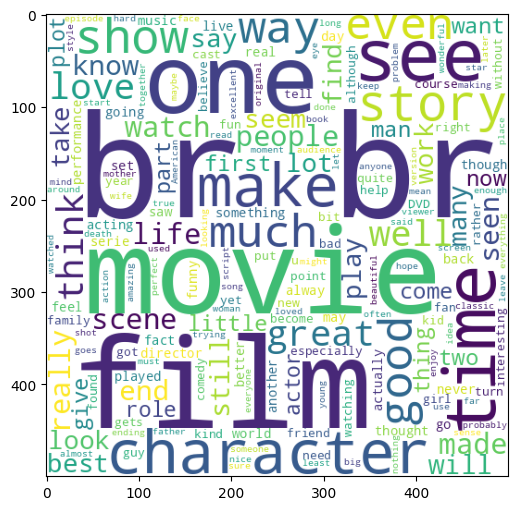

In [28]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
positive_wc = wc.generate(df[df['sentiment'] == 'positive']['review'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

**checking negative reviews**

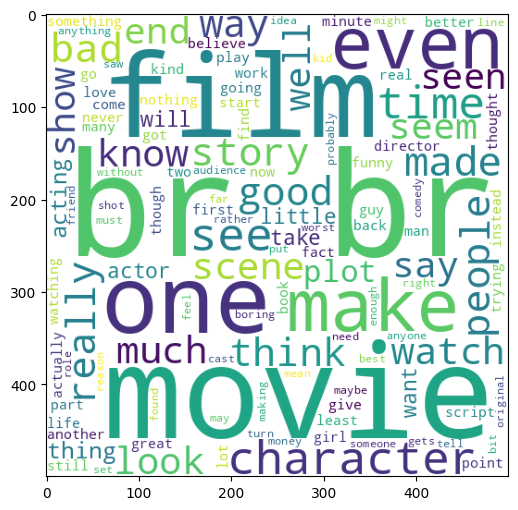

In [29]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
neg_wc = wc.generate(df[df['sentiment'] == 'negative']['review'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(neg_wc)

**vectorization**

In [30]:
x = df['review']
y=df['sentiment']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [31]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer(max_features=3000,ngram_range=(1,1))
x=cv.fit_transform(x).toarray()

**splitting train test set**

In [32]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state = 42)

In [33]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

**using GaussianNB model**

In [34]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.77442775032772
[[4259  680]
 [1557 3421]]
0.83418678371129


**using MultinomialNB model**

In [37]:
mnb.fit(x_train,y_train)
y_pred2 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.77442775032772
[[4259  680]
 [1557 3421]]
0.83418678371129


**using BernoulliNB model**

In [36]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8379550267217909
[[4032  907]
 [ 700 4278]]
0.8250723240115718
